## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

**Delivery time - Predict delivery time using sorting time**

## Imported Libraries And Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/04_Simple%20Linear%20Regression/Dataset/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Performing EDA on the given dataset

### Applying Descriptive Statistics

In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Visualizing The Data

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

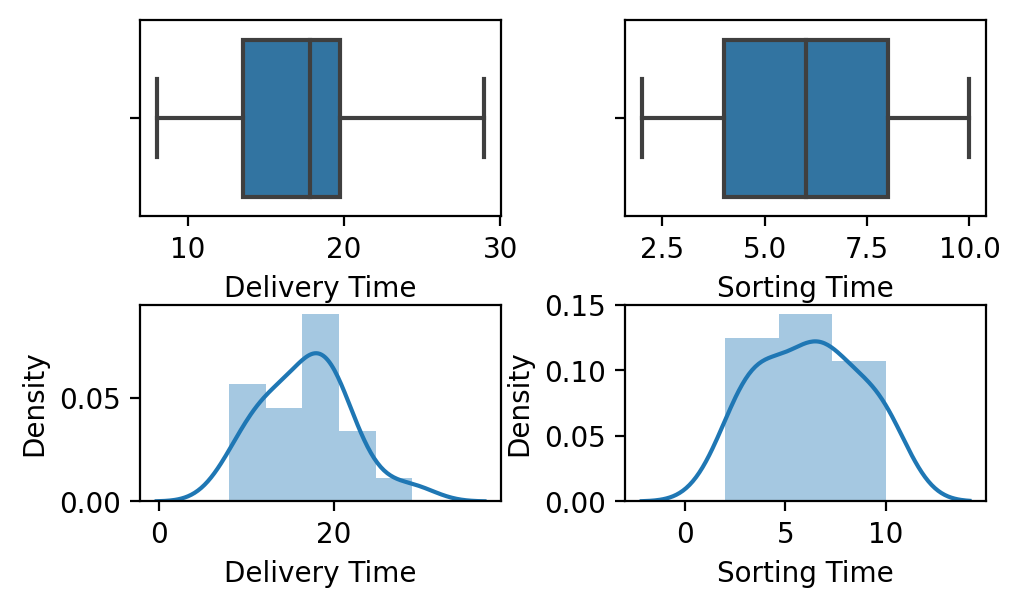

In [6]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(df['Delivery Time'], ax = ax[0,0])
sns.boxplot(df['Sorting Time'], ax = ax[0,1])
sns.distplot(df['Delivery Time'], ax = ax[1,0])
sns.distplot(df['Sorting Time'], ax = ax[1,1])

In [7]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

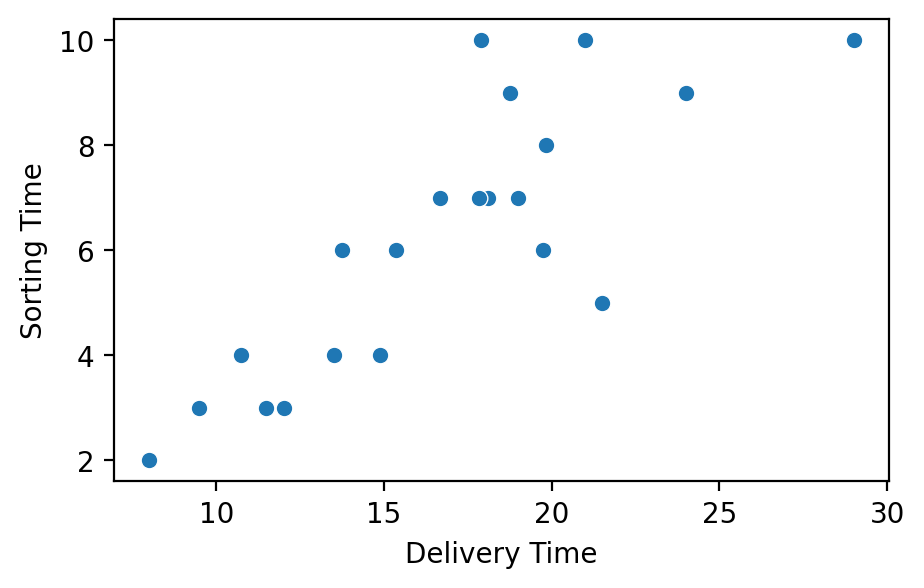

In [8]:
sns.scatterplot(df['Delivery Time'],df['Sorting Time'])

<AxesSubplot:>

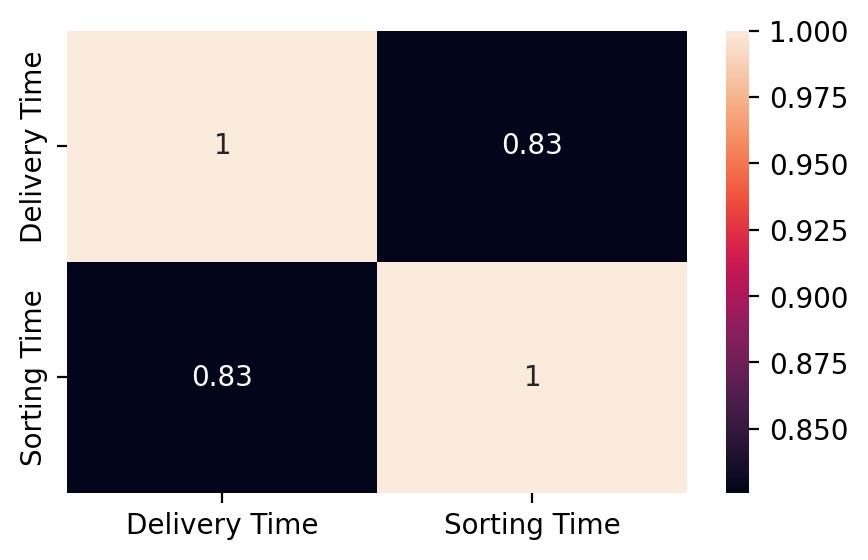

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df['Delivery Time'].skew()

0.3523900822831107

In [11]:
df['Sorting Time'].skew()

0.047115474210530174

- As skewness value is between -0.5 to 0.5, so we can keep the orignal data

In [12]:
df = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

### Transforming The Data

- Log Transformation

In [13]:
df['log_Delivery_Time'] = np.log(df['Delivery_Time'])
df['log_Sorting_Time'] = np.log(df['Sorting_Time'])

df.head()

,Delivery_Time,Sorting_Time,log_Delivery_Time,log_Sorting_Time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


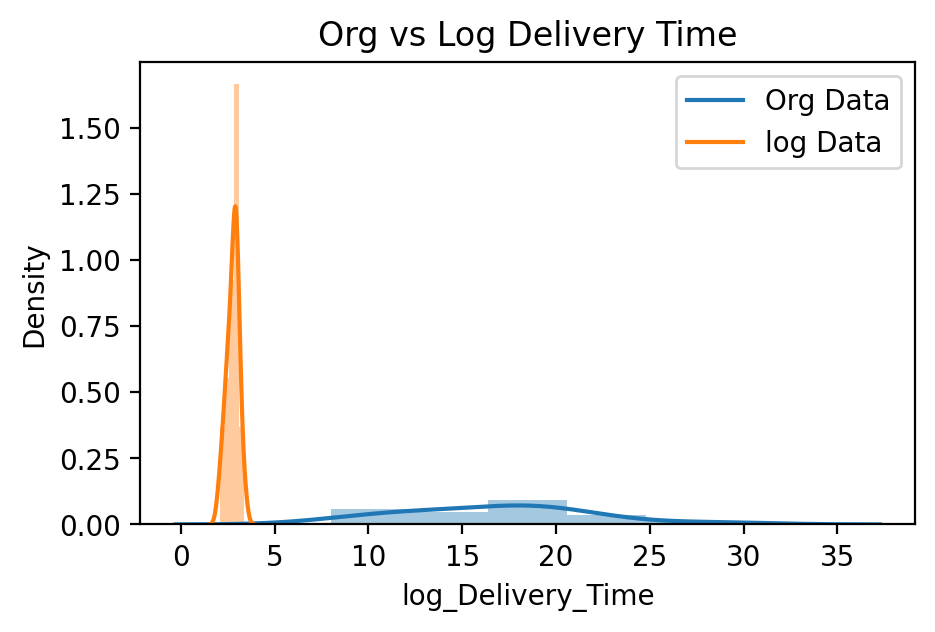

In [56]:
labels = ['Org Data','log Data']
sns.distplot(df['Delivery_Time'])
sns.distplot(df['log_Delivery_Time'])
plt.title('Org vs Log Delivery Time')
plt.legend(labels)
plt.show()

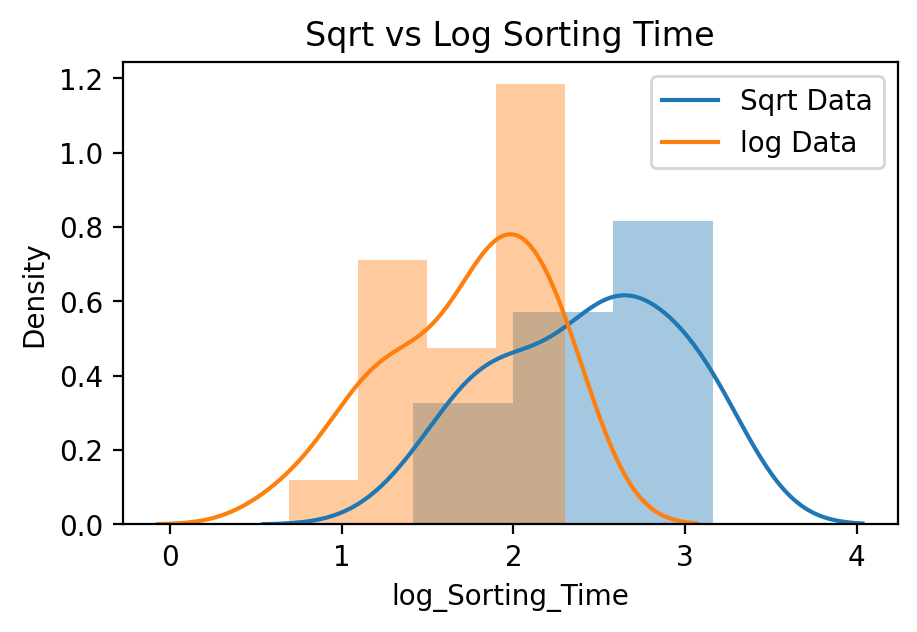

In [57]:
labels = ['Sqrt Data','log Data']
sns.distplot(df['sqrt_Sorting_Time'])
sns.distplot(df['log_Sorting_Time'])
plt.title('Sqrt vs Log Sorting Time')
plt.legend(labels)
plt.show()

In [15]:
df['sqrt_Delivery_Time'] = np.sqrt(df['Delivery_Time'])
df['sqrt_Sorting_Time'] = np.sqrt(df['Sorting_Time'])

df.head()

,Delivery_Time,Sorting_Time,log_Delivery_Time,log_Sorting_Time,sqrt_Delivery_Time,sqrt_Sorting_Time
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


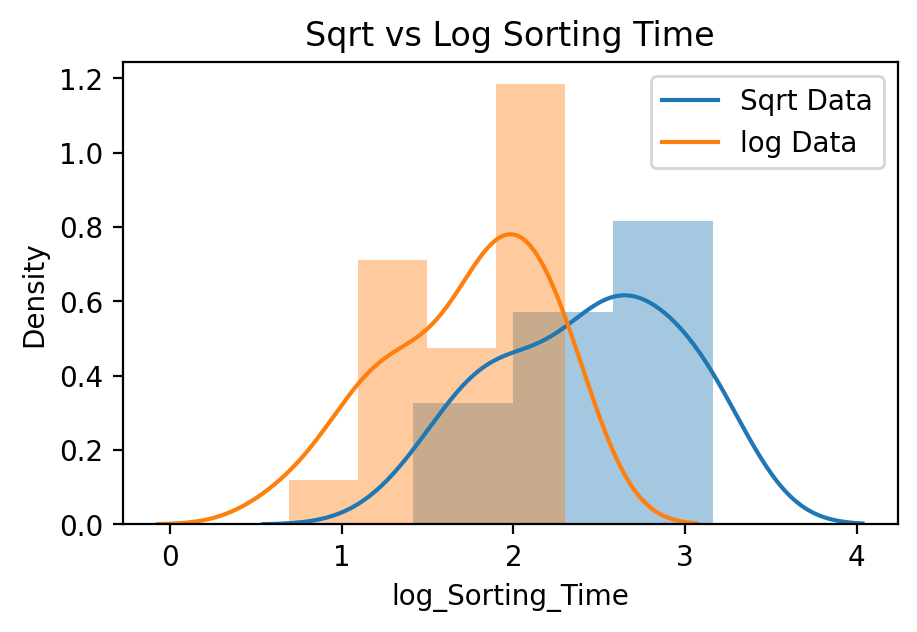

In [55]:
labels = ['Sqrt Data','log Data']
sns.distplot(df['sqrt_Sorting_Time'])
sns.distplot(df['log_Sorting_Time'])
plt.title('Sqrt vs Log Sorting Time')
plt.legend(labels)
plt.show()

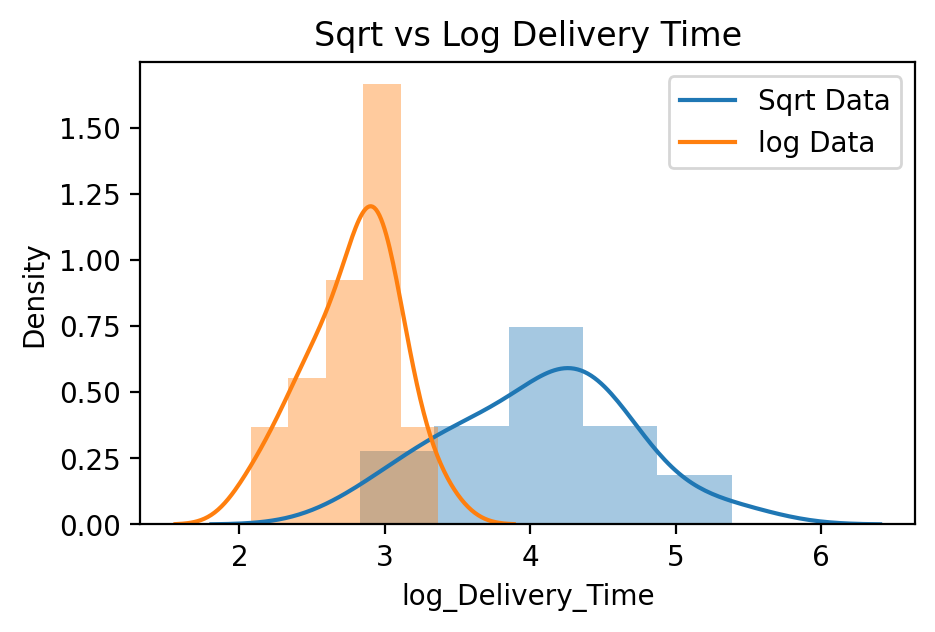

In [54]:
labels = ['Sqrt Data','log Data']
sns.distplot(df['sqrt_Delivery_Time'])
sns.distplot(df['log_Delivery_Time'])
plt.title('Sqrt vs Log Delivery Time')
plt.legend(labels)
plt.show()

## Building Model From The Data

### Creating Model With Orignal Data

In [17]:
org_model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()

In [18]:
print('\n T-Value of model wtin orignal value', '\n', org_model.tvalues)
print('\n P-Value of model wtin orignal value', '\n', org_model.pvalues)


 T-Value of model wtin orignal value 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

 P-Value of model wtin orignal value 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [19]:
org_model.rsquared

0.6822714748417231

- As accuracy of the model with orignal data is low, so we will try with sqrt data

### Creating Model With Sqrt Data

In [20]:
sqrt_model = smf.ols('sqrt_Delivery_Time~sqrt_Sorting_Time', data=df).fit()

In [21]:
print('\n T-Value of model wtin log value', '\n', sqrt_model.tvalues)
print('\n P-Value of model wtin log value', '\n', sqrt_model.pvalues)


 T-Value of model wtin log value 
 Intercept            4.628248
sqrt_Sorting_Time    7.152817
dtype: float64

 P-Value of model wtin log value 
 Intercept            1.833621e-04
sqrt_Sorting_Time    8.475706e-07
dtype: float64


In [22]:
sqrt_model.rsquared

0.7292011987544664

- By using sqrt value the accuracy of the model is increased from 68% to 73%

### Creating Model With Log Data

In [23]:
log_model = smf.ols('log_Delivery_Time~log_Sorting_Time', data=df).fit()

In [24]:
print('\n T-Value of model wtin log value', '\n', org_model.tvalues)
print('\n P-Value of model wtin log value', '\n', org_model.pvalues)


 T-Value of model wtin log value 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

 P-Value of model wtin log value 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [25]:
log_model.rsquared

0.77216134926874

- By using log value the accuracy of the model is increased from 73% to 77%